In [2]:
import numpy as np
import matplotlib.pyplot as plt

NUM_TRIALS = 1000000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

class Bandit:
    def __init__(self, p):
        self.p = p
        self.p_estimate = 0.
        self.N = 0.

    def pull(self):
        return np.random.random() < self.p

    def update(self, x):
        self.N += 1.
        self.p_estimate = ((self.N - 1) * self.p_estimate + x) / self.N

def ucb(mean, n, nj):
    return mean + np.sqrt(2 * np.log(n) / nj)

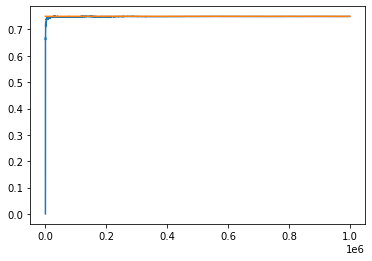

In [5]:
def run_experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    rewards = np.empty(NUM_TRIALS)
    total_plays = 0

    # initialization: play each bandit once
    for j in range(len(bandits)):
        x = bandits[j].pull()
        total_plays += 1
        bandits[j].update(x)

    for i in range(NUM_TRIALS):
        j = np.argmax([ucb(b.p_estimate, total_plays, b.N) for b in bandits])
        x = bandits[j].pull()
        total_plays += 1
        bandits[j].update(x)

        rewards[i] = x

    win_rates = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBABILITIES))
    plt.show()

run_experiment()